### 3.3 Exploratory Data Analysis

#### Goal:
**Exploratory Data Analysis (EDA)** is the first critical step in campaign analytics. It is the process of exploring the data to understand how various factors (variables) influence the campaign outcomes. By performing EDA, we can spot trends, detect issues, and gain insights into how to improve future campaigns.

#### Key Concepts in EDA:

1. **Distributions**:
   - A **distribution** shows how a variable’s values are spread across the population. It highlights where the bulk of observations lie and provides insights into **skewness**, **symmetry**, and **concentration**.
   - For example, in the case of **age**, the distribution is right-skewed (most clients are between 30 and 50 years old). When we condition it on the target variable `y` (subscription), we find that **older clients are more likely to subscribe**.
   - We can also examine **dispersion** through metrics like **standard deviation** and **interquartile range**, which indicate how wide or narrow the variation is in the data. Narrow variation could indicate homogeneous segments, whereas wide variation could suggest heterogeneity in behavior.

2. **Conditional Distributions**:
   - **Conditional distributions** show how the probability of subscription changes with a specific characteristic. For example, **P(y = yes | job = j)** quantifies the likelihood of subscribing based on job type.
   - These insights reveal which groups are more likely to subscribe and help adjust campaign strategies. For example, **students** and **retirees** may have higher subscription rates than **blue-collar workers**.

3. **Covariance and Correlation**:
   - **Covariance** measures how two variables move together. If larger values of one variable are associated with larger values of another, the covariance is positive. Negative covariance means one variable increases as the other decreases.
   - **Formula for Covariance**:
   $$
   \text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
   $$
   - **Correlation** standardizes covariance to remove the units of measurement, making it easier to compare relationships. The correlation coefficient ranges from **-1 to +1**, where values closer to **+1** indicate a strong positive linear relationship, and values closer to **-1** indicate a negative relationship.
   - **Formula for Correlation**:
   $$
   \rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
   $$

4. **Outliers**:
   - Outliers are rare observations that can provide useful insights. For example, a client contacted **20 times** may be an outlier, but could represent a unique segment. Outliers should not be dismissed immediately.
   - Understanding outliers may involve collaborating with other departments to investigate why they exist. Sometimes, outliers might be crucial to understanding customer behavior.

5. **Strategy from EDA**:
   - EDA helps identify which variables matter for campaign success, enabling better **segmentation**, **targeting**, and **resource allocation**.
   - By understanding the data, we can make more informed decisions in the later stages of analysis and modeling.

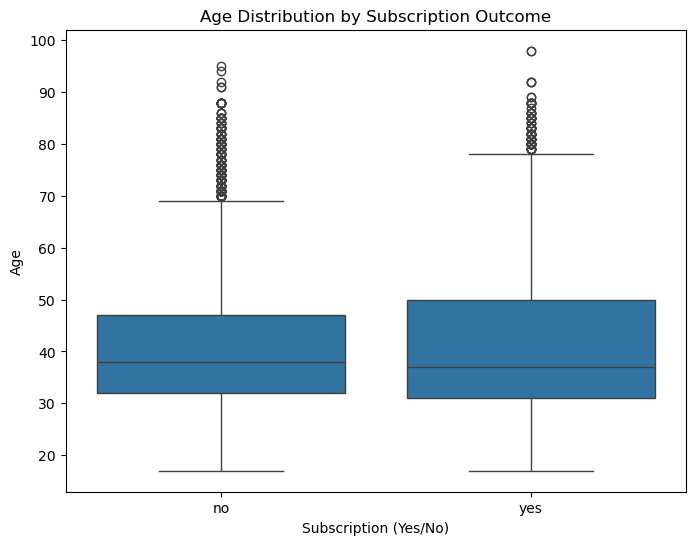

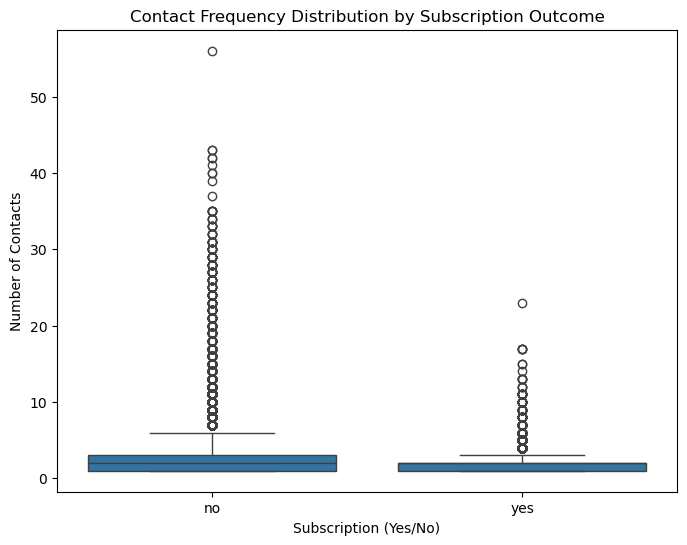

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (use your dataset path here)
df = pd.read_csv("bank-additional-full.csv", sep=";")

# Step 1: Distribution of Age by Subscription Outcome (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Age Distribution by Subscription Outcome')
plt.xlabel('Subscription (Yes/No)')
plt.ylabel('Age')
plt.show()

# Step 2: Distribution of Contact Frequency (campaign) by Subscription Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='campaign', data=df)
plt.title('Contact Frequency Distribution by Subscription Outcome')
plt.xlabel('Subscription (Yes/No)')
plt.ylabel('Number of Contacts')
plt.show()

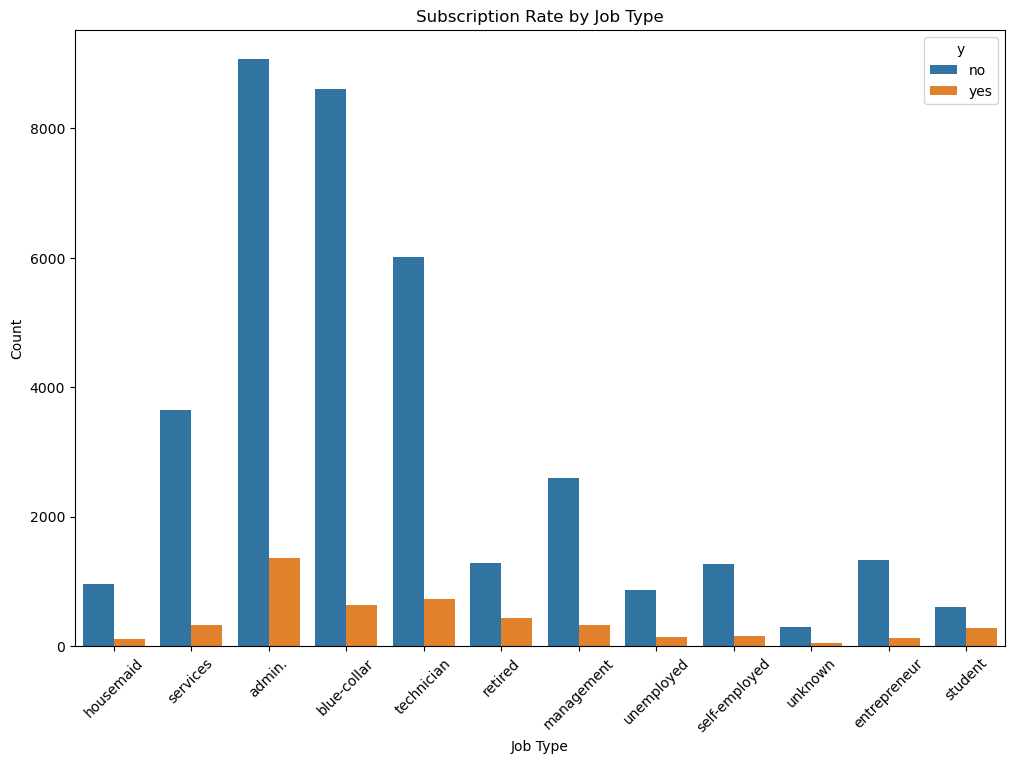

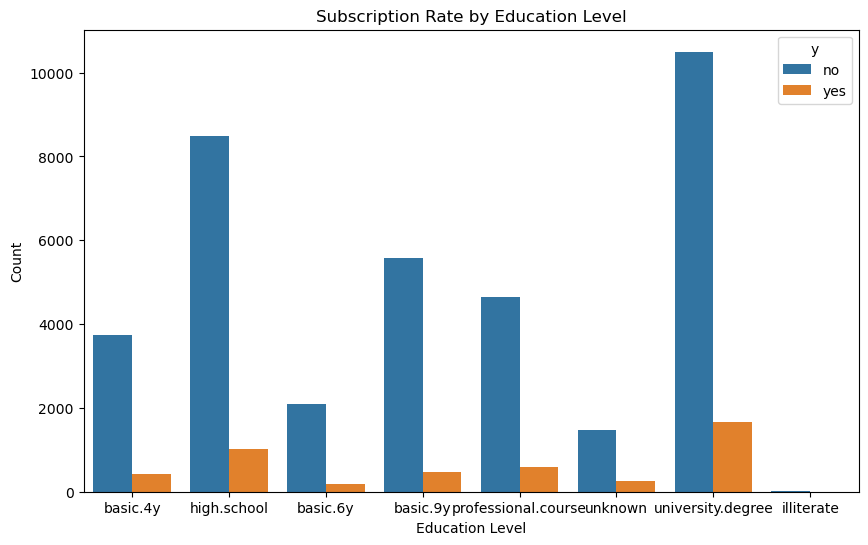

In [2]:
# Step 3: Subscription Rate by Job Type
plt.figure(figsize=(12, 8))
sns.countplot(x='job', hue='y', data=df)
plt.title('Subscription Rate by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 4: Subscription Rate by Education Level
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df)
plt.title('Subscription Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

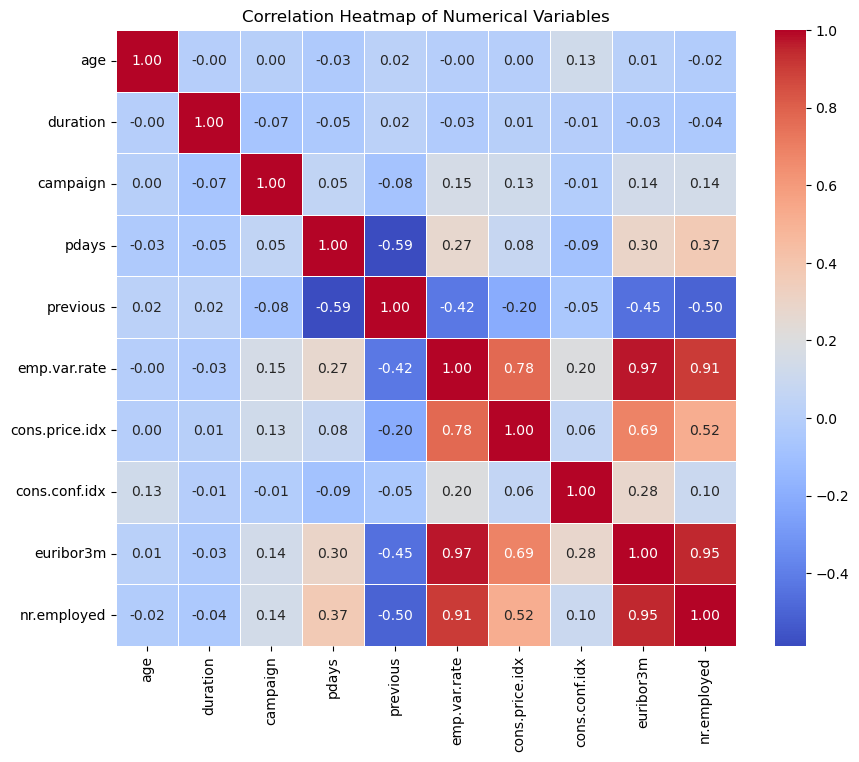

Correlation between Euribor3m and Employment Variation Rate: 0.97


In [4]:
# Step 5: Correlation Heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Check if both columns exist in numeric_df before calculating specific correlation
if 'euribor3m' in numeric_df.columns and 'emp.var.rate' in numeric_df.columns:
    correlation_euribor_emp = numeric_df[['euribor3m', 'emp.var.rate']].corr()
    print(f"Correlation between Euribor3m and Employment Variation Rate: {correlation_euribor_emp.iloc[0, 1]:.2f}")
else:
    print("One or both columns ('euribor3m', 'emp.var.rate') are not numeric or don't exist in the dataset")

Outliers in Age: Empty DataFrame
Columns: [age, y]
Index: []


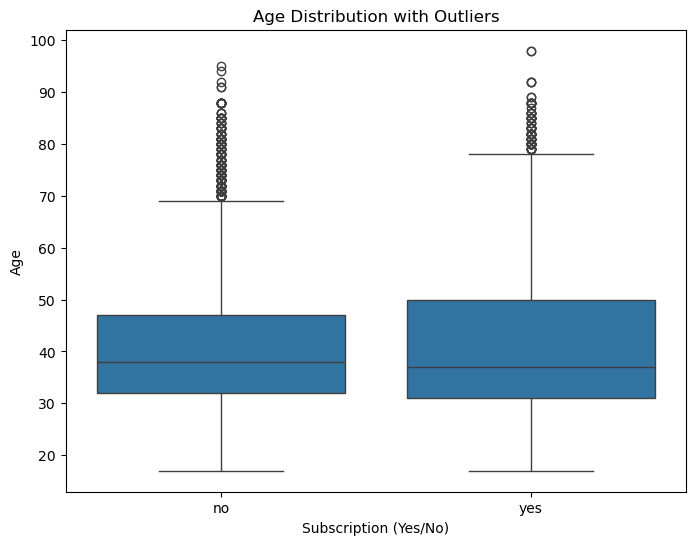

Outliers in Contact Frequency:        campaign    y
3219         23  yes
3370         22   no
3413         23   no
3438         25   no
3652         22   no
...         ...  ...
23592        22   no
23625        21   no
23727        23   no
27774        22   no
30124        23   no

[157 rows x 2 columns]


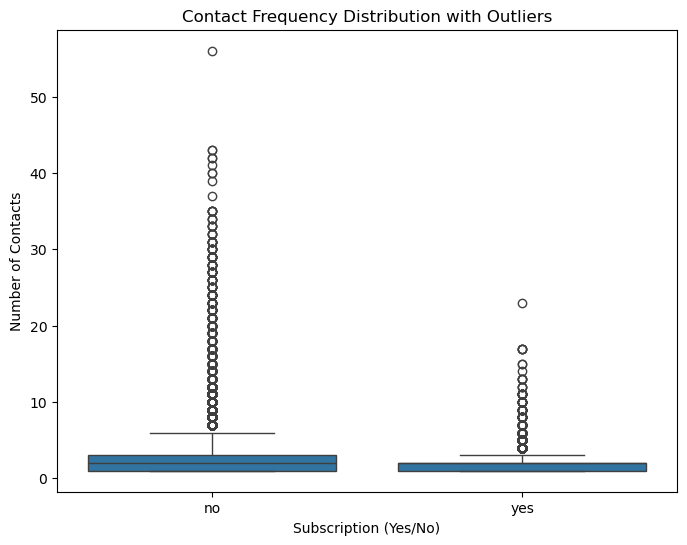

In [5]:
# Step 6: Identifying Outliers in Age
age_outliers = df[df['age'] > 100]  # Clients with age > 100 are likely outliers
print(f"Outliers in Age: {age_outliers[['age', 'y']]}")
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Age Distribution with Outliers')
plt.xlabel('Subscription (Yes/No)')
plt.ylabel('Age')
plt.show()

# Step 7: Identifying Outliers in Contact Frequency (campaign)
contact_outliers = df[df['campaign'] > 20]  # Clients contacted more than 20 times
print(f"Outliers in Contact Frequency: {contact_outliers[['campaign', 'y']]}")
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='campaign', data=df)
plt.title('Contact Frequency Distribution with Outliers')
plt.xlabel('Subscription (Yes/No)')
plt.ylabel('Number of Contacts')
plt.show()